In [1]:
import csv
import pandas as pd
from datetime import datetime
import calendar
import warnings
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../CSV/comic_characters.csv")
df.head()

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,"2002, July",Earth-616,Marvel
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,"1984, August",Earth-616,Marvel
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,"1985, January",New Earth,DC
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,"2004, March",New Earth,DC
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,"1999, December",New Earth,DC


In [3]:
def clean_and_convert(date_str):
    parts = date_str.split(', ')
    year = int(parts[0])
    
    month = 'Jan'
    if len(parts) > 1:
        month_name = parts[1]

        month_abbreviations = {
            'January': 'Jan', 'February': 'Feb', 'March': 'Mar',
            'April': 'Apr', 'May': 'May', 'June': 'Jun',
            'July': 'Jul', 'August': 'Aug', 'September': 'Sep',
            'October': 'Oct', 'November': 'Nov', 'December': 'Dec'
        }
        month = month_abbreviations.get(month_name, 'Jan')

    return f'{month}/{year}'

df['First_appeared'] = df['First_appeared'].apply(clean_and_convert)
df.head()

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,Jul/2002,Earth-616,Marvel
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,Aug/1984,Earth-616,Marvel
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,Jan/1985,New Earth,DC
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,Mar/2004,New Earth,DC
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,Dec/1999,New Earth,DC


In [4]:
marvel_df = df[df["Universe"] == "Marvel"]
marvel_df

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,Jul/2002,Earth-616,Marvel
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,Aug/1984,Earth-616,Marvel
8,8,Perkins,Public,Bad,Green,White,Female,Yes,1,Oct/1964,Earth-616,Marvel
9,9,Zuhn,Secret,Bad,White,Blond,Male,No,3,Nov/2000,Earth-616,Marvel
10,10,Azaziah,Secret,Bad,Blue,White,Male,Yes,4,Apr/1980,Earth-616,Marvel
...,...,...,...,...,...,...,...,...,...,...,...,...
21135,21135,Dennis Hoxie,Secret,Bad,Brown,Blond,Male,Yes,1,Sep/2006,Earth-616,Marvel
21137,21137,Feldspar,Public,Neutral,Brown,Blond,Male,Yes,9,May/1983,Earth-616,Marvel
21138,21138,Valtrauta,Secret,Good,Red,Blond,Female,Yes,8,Apr/1963,Earth-616,Marvel
21140,21140,Jim Morita,Secret,Bad,Brown,Black,Male,Yes,4,Jan/1967,Earth-616,Marvel


In [5]:
dc_df = df[df["Universe"] == "DC"]
dc_df

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,Jan/1985,New Earth,DC
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,Mar/2004,New Earth,DC
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,Dec/1999,New Earth,DC
5,5,Trygg,Secret,Bad,Black,Black,Male,Yes,3,Jun/1940,New Earth,DC
6,6,Boris Dmitravich Razumihin,Public,Good,Brown,Black,Male,Yes,7,Dec/1987,New Earth,DC
...,...,...,...,...,...,...,...,...,...,...,...,...
21132,21132,Sebastian Rothschild,Public,Bad,Black,Black,Male,Yes,2,Apr/2010,New Earth,DC
21136,21136,Silver St. Cloud,Public,Bad,Blue,Silver,Female,No,26,Jun/1977,New Earth,DC
21139,21139,Winslow Schott,Public,Bad,Blue,Brown,Male,Yes,74,Sep/1943,New Earth,DC
21142,21142,Miya Shimada,Secret,Good,Brown,Black,Female,Yes,46,May/1984,New Earth,DC


In [6]:
marvel_good_df = marvel_df[marvel_df["Alignment"] == "Good"]
marvel_good_df.reset_index()

,index,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,Jul/2002,Earth-616,Marvel
1,1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,Aug/1984,Earth-616,Marvel
2,16,16,Sally Avril,Secret,Good,Brown,Black,Female,No,76,Aug/1962,Earth-616,Marvel
3,24,24,Plazm,Secret,Good,Red,Blue,Male,No,4,Jul/2001,Earth-616,Marvel
4,35,35,LaHoya Scripps,Secret,Good,Blue,Blond,Female,Yes,8,Dec/1991,Earth-616,Marvel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,21099,21099,Mikal Drakonmegas,Secret,Good,Green,Red,Male,Yes,10,Jul/1992,Earth-616,Marvel
5079,21111,21111,Old Troll,Secret,Good,Green,White,Unknown,Yes,1,Aug/1986,Earth-616,Marvel
5080,21133,21133,Rafael Carago,Secret,Good,White,Black,Male,Yes,14,Aug/1995,Earth-616,Marvel
5081,21138,21138,Valtrauta,Secret,Good,Red,Blond,Female,Yes,8,Apr/1963,Earth-616,Marvel


In [7]:
marvel_neutral_df = marvel_df[marvel_df["Alignment"] == "Neutral"]
marvel_neutral_df.reset_index()

,index,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,13,13,Caryn Wise,Non-dual,Neutral,White,Brown,Female,Yes,2,Apr/1983,Earth-616,Marvel
1,14,14,Otto Octavius,Secret,Neutral,Hazel,Brown,Male,No,526,Jul/1963,Earth-616,Marvel
2,31,31,Phantom of the Bell Tower,Secret,Neutral,Red,Bald,Male,Yes,1,Jan/1942,Earth-616,Marvel
3,32,32,Tamara Hashioka,Non-dual,Neutral,Black,Black,Female,Yes,22,Aug/1977,Earth-616,Marvel
4,46,46,Ouranos,Public,Neutral,Variable,Variable,Male,Yes,3,Jun/2008,Earth-616,Marvel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,21101,21101,Koln,Public,Neutral,Yellow,No,Unknown,Yes,1,Jul/1991,Earth-616,Marvel
2320,21104,21104,Jeanne Chretien,Secret,Neutral,Blue,Blond,Female,Yes,2,Dec/1985,Earth-616,Marvel
2321,21119,21119,Colin Muldowney,Public,Neutral,Blue,Black,Male,Yes,2,Feb/1997,Earth-616,Marvel
2322,21124,21124,Rodney Adams,Public,Neutral,Blue,Blond,Male,Yes,1,Mar/1946,Earth-616,Marvel


In [8]:
marvel_bad_df = marvel_df[marvel_df["Alignment"] == "Bad"]
marvel_bad_df.reset_index()

,index,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,8,8,Perkins,Public,Bad,Green,White,Female,Yes,1,Oct/1964,Earth-616,Marvel
1,9,9,Zuhn,Secret,Bad,White,Blond,Male,No,3,Nov/2000,Earth-616,Marvel
2,10,10,Azaziah,Secret,Bad,Blue,White,Male,Yes,4,Apr/1980,Earth-616,Marvel
3,12,12,Wild One,Public,Bad,Variable,Black,Male,Yes,3,Jul/1992,Earth-616,Marvel
4,15,15,Black Cougar,Non-dual,Bad,Black,Black,Male,No,1,Sep/1951,Earth-616,Marvel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,21127,21127,Eric Karlin,Public,Bad,Black,Brown,Male,No,1,Jan/1942,Earth-616,Marvel
7254,21131,21131,Sidney Green,Public,Bad,Multiple,No,Male,No,27,Aug/2005,Earth-616,Marvel
7255,21134,21134,Yoshida Asano,Public,Bad,Brown,Black,Male,No,1,Jun/1990,Earth-616,Marvel
7256,21135,21135,Dennis Hoxie,Secret,Bad,Brown,Blond,Male,Yes,1,Sep/2006,Earth-616,Marvel


In [9]:
appearances_bins = [0,10,100,250,500,750,1000,1500,2000,3000,50000]
group_names = ["<10","<100","<250","<500","<750","<1000","<1500","<2000","<3000",">3000"]

marvel_df["Appearances Bins"] = pd.cut(marvel_df["Appearances"],
                                     appearances_bins, labels=group_names,
                                      include_lowest=True)
marvel_df.head()

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Appearances Bins
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,Jul/2002,Earth-616,Marvel,<10
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,Aug/1984,Earth-616,Marvel,<250
8,8,Perkins,Public,Bad,Green,White,Female,Yes,1,Oct/1964,Earth-616,Marvel,<10
9,9,Zuhn,Secret,Bad,White,Blond,Male,No,3,Nov/2000,Earth-616,Marvel,<10
10,10,Azaziah,Secret,Bad,Blue,White,Male,Yes,4,Apr/1980,Earth-616,Marvel,<10


In [10]:
dc_good_df = dc_df[dc_df["Alignment"] == "Good"]
dc_good_df.reset_index()

,index,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,6,6,Boris Dmitravich Razumihin,Public,Good,Brown,Black,Male,Yes,7,Dec/1987,New Earth,DC
1,7,7,Perry White,Public,Good,Blue,Brown,Male,Yes,350,Oct/1986,New Earth,DC
2,11,11,Vladimir Morakov,Public,Good,Black,Brown,Male,Yes,8,Dec/1989,New Earth,DC
3,17,17,Nina Mazursky,Secret,Good,White,No,Female,Yes,3,Aug/2011,New Earth,DC
4,18,18,Tubby Watts,Secret,Good,Brown,Red,Male,Yes,137,Sep/1941,New Earth,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,21128,21128,Atlee,Secret,Good,Violet,Black,Female,Yes,22,Jan/2007,New Earth,DC
2870,21129,21129,Courtney Whitmore,Secret,Good,Blue,Blond,Female,Yes,305,Jul/1999,New Earth,DC
2871,21130,21130,Gregor Gregorovich,Non-dual,Good,Blue,Brown,Male,Yes,11,Dec/1987,New Earth,DC
2872,21142,21142,Miya Shimada,Secret,Good,Brown,Black,Female,Yes,46,May/1984,New Earth,DC


In [11]:
dc_neutral_df = dc_df[dc_df["Alignment"] == "Neutral"]
dc_neutral_df.reset_index()

,index,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,23,23,Fashion Thing,Public,Neutral,Blue,White,Female,Yes,14,Sep/1968,New Earth,DC
1,36,36,Fidel Castro,Public,Neutral,Black,White,Male,Yes,4,Jan/1988,New Earth,DC
2,44,44,Teekl,Public,Neutral,Red,Orange,Male,Yes,43,Mar/1973,New Earth,DC
3,54,54,Chantinelle,Public,Neutral,Brown,Brown,Female,Yes,9,Jul/1991,New Earth,DC
4,70,70,Jeb Turnbull,Public,Neutral,Brown,Black,Male,Yes,3,Aug/1974,New Earth,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,20920,20920,Himon,Public,Neutral,Blue,White,Male,Yes,21,Aug/1972,New Earth,DC
609,20921,20921,Violet,Secret,Neutral,Brown,Red,Female,Yes,5,Mar/2008,New Earth,DC
610,20967,20967,Natalie Gurdin,Secret,Neutral,Brown,Brown,Female,Yes,13,Mar/1988,New Earth,DC
611,21008,21008,Tyrone the Dog,Secret,Neutral,Blue,Grey,Male,Yes,14,Nov/2006,New Earth,DC


In [12]:
dc_bad_df = dc_df[dc_df["Alignment"] == "Bad"]
dc_bad_df.reset_index()

,index,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,Jan/1985,New Earth,DC
1,3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,Mar/2004,New Earth,DC
2,4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,Dec/1999,New Earth,DC
3,5,5,Trygg,Secret,Bad,Black,Black,Male,Yes,3,Jun/1940,New Earth,DC
4,26,26,Simyan,Public,Bad,Brown,Brown,Male,Yes,20,Jan/1971,New Earth,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,21117,21117,Detonator,Secret,Bad,Black,Brown,Male,Yes,9,Jan/2008,New Earth,DC
2988,21120,21120,Hetepkheti Tefnakhte,Public,Bad,Red,Brown,Male,Yes,3,Dec/1975,New Earth,DC
2989,21132,21132,Sebastian Rothschild,Public,Bad,Black,Black,Male,Yes,2,Apr/2010,New Earth,DC
2990,21136,21136,Silver St. Cloud,Public,Bad,Blue,Silver,Female,No,26,Jun/1977,New Earth,DC


In [13]:
dc_df["Appearances Bins"] = pd.cut(dc_df["Appearances"],
                                  appearances_bins, labels=group_names,
                                  include_lowest=True)
dc_df.head(50)



,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Appearances Bins
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,Jan/1985,New Earth,DC,<100
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,Mar/2004,New Earth,DC,<100
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,Dec/1999,New Earth,DC,<100
5,5,Trygg,Secret,Bad,Black,Black,Male,Yes,3,Jun/1940,New Earth,DC,<10
6,6,Boris Dmitravich Razumihin,Public,Good,Brown,Black,Male,Yes,7,Dec/1987,New Earth,DC,<10
7,7,Perry White,Public,Good,Blue,Brown,Male,Yes,350,Oct/1986,New Earth,DC,<500
11,11,Vladimir Morakov,Public,Good,Black,Brown,Male,Yes,8,Dec/1989,New Earth,DC,<10
17,17,Nina Mazursky,Secret,Good,White,No,Female,Yes,3,Aug/2011,New Earth,DC,<10
18,18,Tubby Watts,Secret,Good,Brown,Red,Male,Yes,137,Sep/1941,New Earth,DC,<250
19,19,Growler,Non-dual,Good,Brown,Black,Male,Yes,11,Apr/1998,New Earth,DC,<100


In [14]:
dc_bins_sorted_df = dc_df.groupby("Appearances Bins")
dc_bins_sorted_df.max()

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
Appearances Bins,,,,,,,,,,,,
<10,21143,Zzlrrrzzzm,Unknown,Neutral,Yellow,Yellow,Unknown,Yes,10,Sep/2011,Unknown,DC
<100,21142,Zviad Baazovi,Unknown,Neutral,Yellow,Yellow,Unknown,Yes,100,Sep/2010,Unknown,DC
<250,20900,Zinda Blake,Secret,Neutral,Yellow,White,Unknown,Yes,250,Sep/1996,Unknown,DC
<500,21129,Zatanna Zatara,Secret,Neutral,White,White,Male,Yes,492,Sep/1983,New Earth,DC
<750,20803,Victor Stone,Secret,Neutral,Green,Red,Male,Yes,716,Oct/1986,New Earth,DC
<1000,17636,Lois Lane,Secret,Good,Blue,Red,Male,Yes,969,Jun/1938,New Earth,DC
<1500,20999,Wonder Woman,Secret,Good,Brown,White,Male,Yes,1316,Oct/1956,Unknown,DC
<2000,6340,Green Lantern,Secret,Good,Brown,Brown,Male,Yes,1565,Oct/1959,Unknown,DC
<3000,14876,Superman,Secret,Good,Blue,Black,Male,Yes,2496,Oct/1986,Unknown,DC


In [15]:
marvel_bins_sorted_df = marvel_df.groupby("Appearances Bins")
marvel_bins_sorted_df.min()

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
Appearances Bins,,,,,,,,,,,,
<10,0,107,Known to Authorities,Bad,Amber,Auburn,Female,No,1,Apr/1940,Earth-11052,Marvel
<100,16,A Friend,Known to Authorities,Bad,Amber,Auburn,Female,No,11,Apr/1940,Earth-5012,Marvel
<250,1,Adolf Hitler,Known to Authorities,Bad,Black,Auburn,Female,No,101,Apr/1949,Earth-616,Marvel
<500,80,Abner Jenkins,Known to Authorities,Bad,Amber,Auburn,Female,No,252,Apr/1963,Earth-616,Marvel
<750,14,Alexander Summers,Non-dual,Bad,Black,Auburn,Female,No,502,Apr/1964,Earth-616,Marvel
<1000,1629,Carol Danvers,Non-dual,Good,Blue,Black,Female,Yes,752,Aug/1962,Earth-616,Marvel
<1500,4453,Charles Xavier,Non-dual,Good,Blue,Auburn,Female,No,1007,Apr/1964,Earth-616,Marvel
<2000,1022,Henry McCoy,Public,Good,Blue,Blond,Female,Yes,1512,May/1975,Earth-616,Marvel
<3000,2253,Benjamin Grimm,Non-dual,Good,Blue,Black,Male,Yes,2017,Mar/1963,Earth-616,Marvel


In [16]:
marvel_sortby_eyes_df = marvel_df.sort_values(by=['Eyes','Appearances Bins'])
marvel_sortby_eyes_df

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Appearances Bins
492,492,Mercedes Wilson,Secret,Good,Amber,Red,Female,Yes,9,Mar/1999,Earth-616,Marvel,<10
4298,4298,Araq Mezdbadah,Secret,Good,Amber,Blond,Male,Yes,2,Nov/1992,Earth-616,Marvel,<10
4831,4831,Zebadiah Creed,Secret,Bad,Amber,Brown,Male,No,4,Aug/1993,Earth-616,Marvel,<10
5020,5020,Scythe,Non-dual,Bad,Amber,Brown,Male,Yes,2,Jul/1974,Earth-616,Marvel,<10
7856,7856,Jin Lee,Secret,Good,Amber,Black,Female,Yes,2,Oct/2012,Earth-616,Marvel,<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,8631,Dormammu,Non-dual,Bad,Yellow,No,Male,Yes,132,Nov/1964,Earth-616,Marvel,<250
10112,10112,Gamora,Non-dual,Neutral,Yellow,Black,Female,Yes,218,Jun/1975,Earth-616,Marvel,<250
19431,19431,Supreme Intelligence,Non-dual,Neutral,Yellow,Green,Male,Yes,128,Aug/1967,Earth-616,Marvel,<250
6607,6607,Raven Darkholme,Secret,Bad,Yellow,Red,Female,Yes,371,Apr/1978,Earth-616,Marvel,<500


In [17]:
marvel_sortby_hair_df = marvel_df.sort_values(by=['Hair','Appearances Bins'])
marvel_sortby_hair_df

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Appearances Bins
238,238,Asahiri Aoki,Secret,Bad,Brown,Auburn,Female,Yes,4,May/2004,Earth-616,Marvel,<10
413,413,Rusty Randolph,Public,Good,Blue,Auburn,Male,Yes,8,Apr/1949,Earth-616,Marvel,<10
525,525,Floyd Baker,Secret,Neutral,Brown,Auburn,Male,Yes,2,Jun/2007,Earth-616,Marvel,<10
1374,1374,Nasya Ehrlich,Public,Good,Blue,Auburn,Female,Yes,1,Jun/2002,Earth-11052,Marvel,<10
1438,1438,Megaera,Secret,Neutral,Black,Auburn,Female,Yes,6,Sep/1996,Earth-616,Marvel,<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,2486,John Horton,Public,Bad,Yellow,Yellow,Male,Yes,74,Nov/1972,Earth-616,Marvel,<100
10849,10849,Straw Man,Secret,Good,Red,Yellow,Male,Yes,12,Aug/1975,Earth-616,Marvel,<100
11449,11449,Leonus,Secret,Neutral,Blue,Yellow,Male,Yes,27,Oct/1968,Earth-616,Marvel,<100
16968,16968,Tusk,Secret,Bad,White,Yellow,Male,Yes,14,Apr/1991,Earth-616,Marvel,<100


In [18]:
dc_bins_sorted_df = dc_df.groupby("Appearances Bins")
dc_bins_sorted_df

In [19]:
dc_sortby_eyes_df = dc_df.sort_values(by=["Eyes","Appearances Bins"])
dc_sortby_eyes_df

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Appearances Bins
13510,13510,Catwalk,Secret,Bad,Amber,Brown,Female,Yes,6,Sep/1996,New Earth,DC,<10
13671,13671,Beth Zahar,Public,Good,Amber,Red,Female,Yes,6,Oct/1988,New Earth,DC,<10
14664,14664,Jose Montez,Secret,Good,Amber,Black,Male,Yes,2,Sep/1986,New Earth,DC,<10
15091,15091,Coopersmith,Secret,Bad,Amber,Brown,Male,Yes,4,Dec/1983,New Earth,DC,<10
7206,7206,Charlie the Owl,Public,Good,Amber,Blond,Male,Yes,33,Feb/1999,New Earth,DC,<100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20752,20752,Jemm,Public,Good,Yellow,No,Male,Yes,37,Sep/1984,New Earth,DC,<100
2531,2531,Edward Bloomberg,Secret,Good,Yellow,Grey,Male,No,111,Jun/1984,New Earth,DC,<250
7848,7848,Daniel Cassidy,Secret,Good,Yellow,Red,Male,Yes,176,Jun/1984,New Earth,DC,<250
9419,9419,Arisia Rrab,Public,Good,Yellow,Blond,Female,Yes,173,May/1981,New Earth,DC,<250


In [20]:
dc_sortby_hair_df = dc_df.sort_values(by=["Hair","Appearances Bins"])
dc_sortby_hair_df

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe,Appearances Bins
156,156,Yalan Gur,Secret,Bad,Blue,Auburn,Male,No,3,Dec/1991,New Earth,DC,<10
416,416,Gary Johnson,Secret,Bad,Brown,Auburn,Male,Yes,1,Aug/1983,New Earth,DC,<10
2932,2932,Moyshe Nakhman,Secret,Good,Black,Auburn,Male,Yes,9,Sep/1990,New Earth,DC,<10
8672,8672,Nuclear,Secret,Bad,Green,Auburn,Male,Yes,5,Jun/2006,New Earth,DC,<10
9790,9790,Crimson Star,Secret,Bad,Blue,Auburn,Male,Yes,1,Nov/1981,New Earth,DC,<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,7151,Mongo Krebs,Public,Good,Green,Yellow,Male,Yes,2,Jul/1988,New Earth,DC,<10
11526,11526,Bernard Bonner,Secret,Bad,Black,Yellow,Male,Yes,6,May/1984,New Earth,DC,<10
14841,14841,Sleez,Public,Bad,Black,Yellow,Male,No,7,Sep/1987,New Earth,DC,<10
19982,19982,Phantom Barber,Secret,Bad,Brown,Yellow,Male,Yes,1,Apr/1994,New Earth,DC,<10


In [21]:
dc_good_hair_eye_df = dc_good_df[['Hair','Eyes']].value_counts().reset_index()
dc_good_hair_eye_df

,Hair,Eyes,0
0,Black,Brown,365
1,Brown,Brown,290
2,Blond,Blue,251
3,Black,Blue,251
4,Brown,Blue,205
...,...,...,...
156,Orange,Orange,1
157,Pink,Brown,1
158,Pink,Red,1
159,Purple,Gold,1


In [22]:
dc_neutral_hair_eye_df = dc_neutral_df[['Hair','Eyes']].value_counts().reset_index()
dc_neutral_hair_eye_df

,Hair,Eyes,0
0,Black,Brown,73
1,Black,Blue,59
2,Brown,Brown,58
3,Blond,Blue,52
4,Brown,Blue,34
...,...,...,...
76,Green,White,1
77,Green,Green,1
78,Orange,Green,1
79,No,Violet,1


In [23]:
dc_bad_hair_eye_df = dc_bad_df[['Hair','Eyes']].value_counts().reset_index()
dc_bad_hair_eye_df

,Hair,Eyes,0
0,Black,Brown,297
1,Black,Blue,267
2,Brown,Brown,257
3,Brown,Blue,210
4,Blond,Blue,188
...,...,...,...
150,Magenta,Black,1
151,No,Pink,1
152,Orange,Red,1
153,Purple,Brown,1


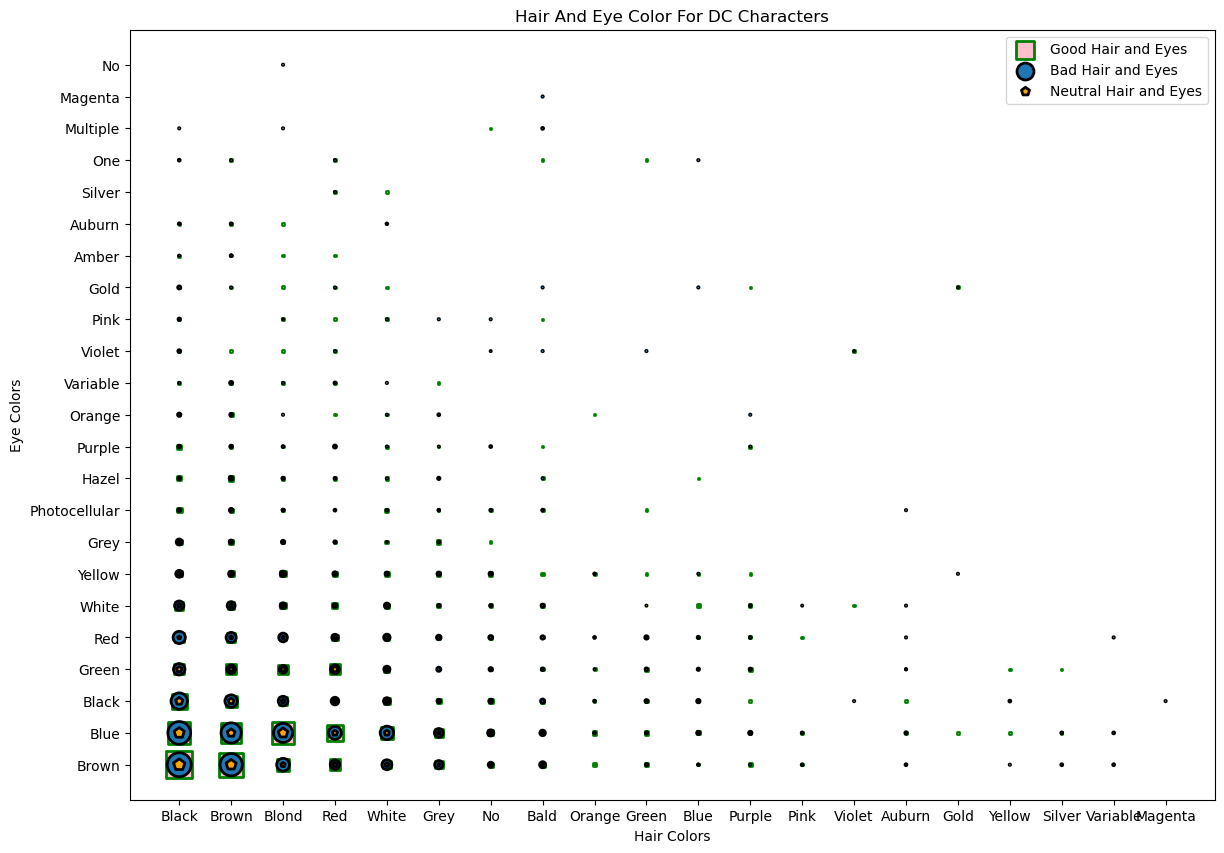

In [24]:
x1, x2, x3 = dc_good_hair_eye_df['Hair'], dc_bad_hair_eye_df['Hair'], dc_neutral_hair_eye_df['Hair']
y1, y2, y3 = dc_good_hair_eye_df['Eyes'], dc_bad_hair_eye_df['Eyes'], dc_neutral_hair_eye_df['Eyes']

plt.figure(figsize=(14,10))
plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = dc_good_hair_eye_df[0],
            label='Good Hair and Eyes')

plt.scatter(x2, y2,
            linewidths = 2,
            marker ="o",
            edgecolor="black",
            s = dc_bad_hair_eye_df[0],
            label='Bad Hair and Eyes')

plt.scatter(x3, y3, c ="orange",
            linewidths = 2,
            marker ="p",
            edgecolor ="black",
            s = dc_neutral_hair_eye_df[0],
            label='Neutral Hair and Eyes')

plt.title("Hair And Eye Color For DC Characters")
plt.xlabel("Hair Colors")
plt.ylabel("Eye Colors")
plt.legend()
plt.show()

In [88]:
t_statistic1, p_value1 = st.ttest_ind(dc_good_hair_eye_df[0], dc_bad_hair_eye_df[0])
t_statistic2, p_value2 = st.ttest_ind(dc_good_hair_eye_df[0], dc_neutral_hair_eye_df[0])
t_statistic3, p_value3 = st.ttest_ind(dc_neutral_hair_eye_df[0], dc_bad_hair_eye_df[0])

print(p_value1)
print(p_value2)
print(p_value3)

if p_value1 <0.05 or p_value2 < 0.05 or p_value3 < 0.05:
    print("You have some data that is statistically relevant!")
else:
    print("You have no relevant data, try something else.")

0.7906512704717858
0.0722417639218576
0.028142344988330317
You have some data that is statistically relevant!
